# 2D Split Operator Method + Spin

We now want to solve the schrödinger equation of the following form:

$$
\hat{H} = -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + mgy - \vec{\sigma} \cdot \vec{B}
$$

Where the B is localized around the center of the simulation (gaussian distribution), and in the X-direction, simplifying the Hamiltonian to:

$$
\hat{H} = -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + mgy - \vec{\sigma_z} \cdot B_z
$$

The wavefunction is being simulated in an x and y plane, and thus we'll put the direction of the magnetic field in the Z-direction.

The particle is prepared in super position, at the same location with the same probabilities.

$$
\Psi = \begin{pmatrix}
\psi_{\uparrow}(x,y,t) \\[6pt]
\psi_{\downarrow}(x,y,t)
\end{pmatrix}
$$

This will affect the phases of the particle in super position. Afterwards, it should be possible to measure spin precession by "projecting" onto X+ and X-.

$$
\psi_{+x}(x,y,t) = \frac{\psi_{\uparrow}(x,y,t) 
\;+\; \psi_{\downarrow}(x,y,t)}{\sqrt{2}}
$$

$$
\psi_{-x}(x,y,t) = \frac{\psi_{\uparrow}(x,y,t) 
\;-\; \psi_{\downarrow}(x,y,t)}{\sqrt{2}}
$$

Then the corresponding probability densities in the +x and −x spin states are $|\psi_{+x}|^2$ and
$|\psi_{-x}|^2$. A relative phase between $\psi_{\uparrow}$ and $\psi_{\downarrow}$ manifests as constructive or destructive interference in these ‘rotated’ basis amplitudes. These are only evidence of precession.

To calculate the actual precession, we'll need to calculate the expectation value of $<S_x>$ and $<S_y>$ at each timestep.

$$
\langle \sigma_x\rangle
=
\iint \Bigl[
 \psi_{\uparrow}^\ast(x,y)\,\psi_{\downarrow}(x,y)
 \;+\;
 \psi_{\downarrow}^\ast(x,y)\,\psi_{\uparrow}(x,y)
\Bigr]
\,d^2r,
\\
\langle \sigma_y\rangle
=
\Im \iint \Bigl[
 \psi_{\uparrow}^\ast(x,y)\,\psi_{\downarrow}(x,y)
 \;-\;
 \psi_{\downarrow}^\ast(x,y)\,\psi_{\uparrow}(x,y)
\Bigr]
\,d^2r
$$

The Precession angle that follows from this can be defined as:

$$
\Theta(t) 
\;=\; 
\tan^{-1}\!\Bigl(\,
\frac{\langle \sigma_y\rangle}{\langle \sigma_x\rangle}
\Bigr).
$$

In [1]:
import matplotlib.pyplot as plt

# for reloading of modules
import importlib
from helpers import logging, physics2dsim_split_spin, plotting_spin, video_spin, data

def reload_modules():
    importlib.reload(logging)
    importlib.reload(physics2dsim_split_spin)
    importlib.reload(plotting_spin)
    importlib.reload(video_spin)
    importlib.reload(data)

# Call this whenever you need to reload the modules
reload_modules()

# Then your regular imports
from helpers.logging import *
from helpers.physics2dsim_split_spin import simulate_2d_spin
from helpers.plotting_spin import plot_simulation_heatmaps_spin
from helpers.video_spin import create_animation_spin
from helpers.data import *

## 2D Simulator - Time Operators

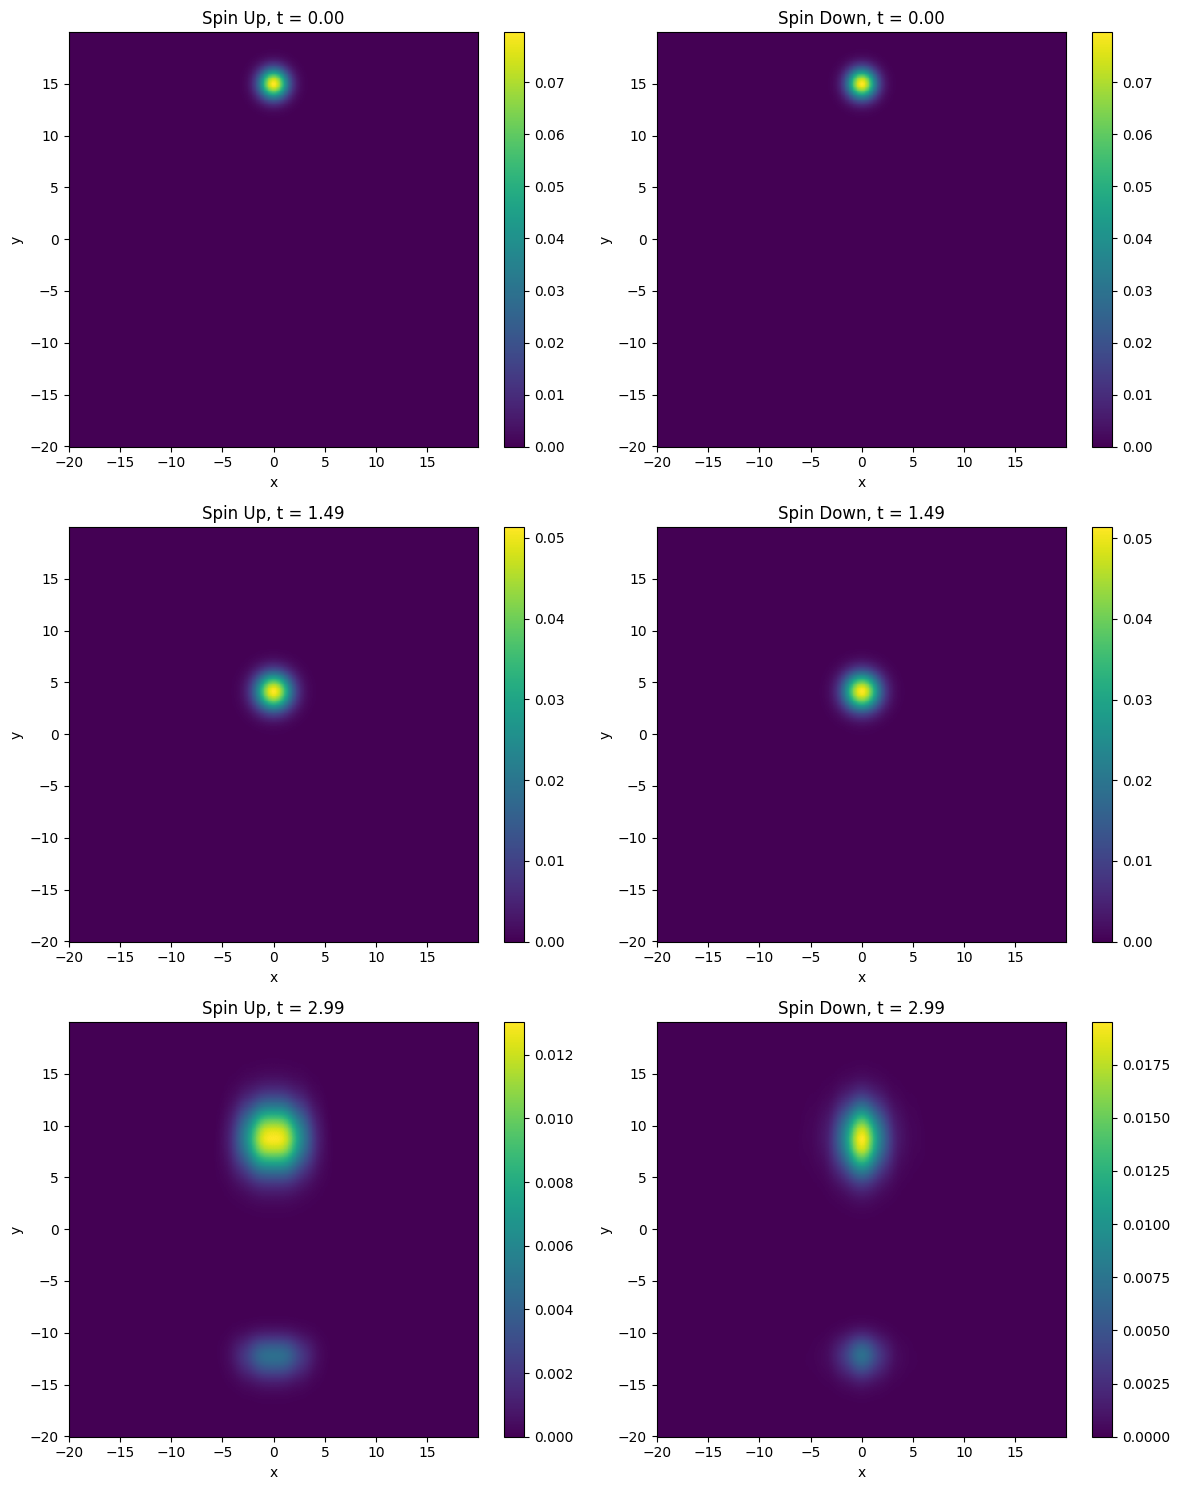

Data saved to: simulations_data/spin/simulation_20250408_01-22.pkl
Animation saved as: simulations_spin/20250408_01-30_quantum_evolution_mag_barrier_strength_2.0.mp4


In [2]:
params = {
	'x_min':-20, 'x_max':20, 'Nx':512,
	'y_min':-20, 'y_max':20, 'Ny':512,
	'n_steps':300, 'dt':0.01,
	'hbar':1.0, 'm':1.0,
	# Parameters for the magnetic barrier (spin-dependent potential)

	# Magnetic barrier parameters
	'mag_barrier_center_x':0.0,
	'mag_barrier_center_y':0.0,
	'mag_barrier_strength':2.0,
	'mag_barrier_width':4,

	'use_gravity':True,
	'g':9.81,

	# Initial wavepacket parameters (same for spin up component)
	'x0':0.0, 'y0':15.0, 'p0x':0.0, 'p0y':0.0, 'sigma':1.0
}

simulation_data = simulate_2d_spin(**params)

# Plot the potential
fig = plot_simulation_heatmaps_spin(simulation_data, num_frames=3)
plt.show()

# Pickle the data
pickle_file = save_simulation_data(simulation_data, params, base_dir='simulations_data/spin/')
print(f"Data saved to: {pickle_file}")

# Create animation
animation_file = create_animation_spin(simulation_data, output_file=f'simulations_spin/{datetime.datetime.now().strftime("%Y%m%d_%H-%M")}_quantum_evolution_mag_barrier_strength_{params["mag_barrier_strength"]}.mp4', fps=1/params['dt'])
log_simulation_parameters(animation_file, params, 'spin')
print(f"Animation saved as: {animation_file}")

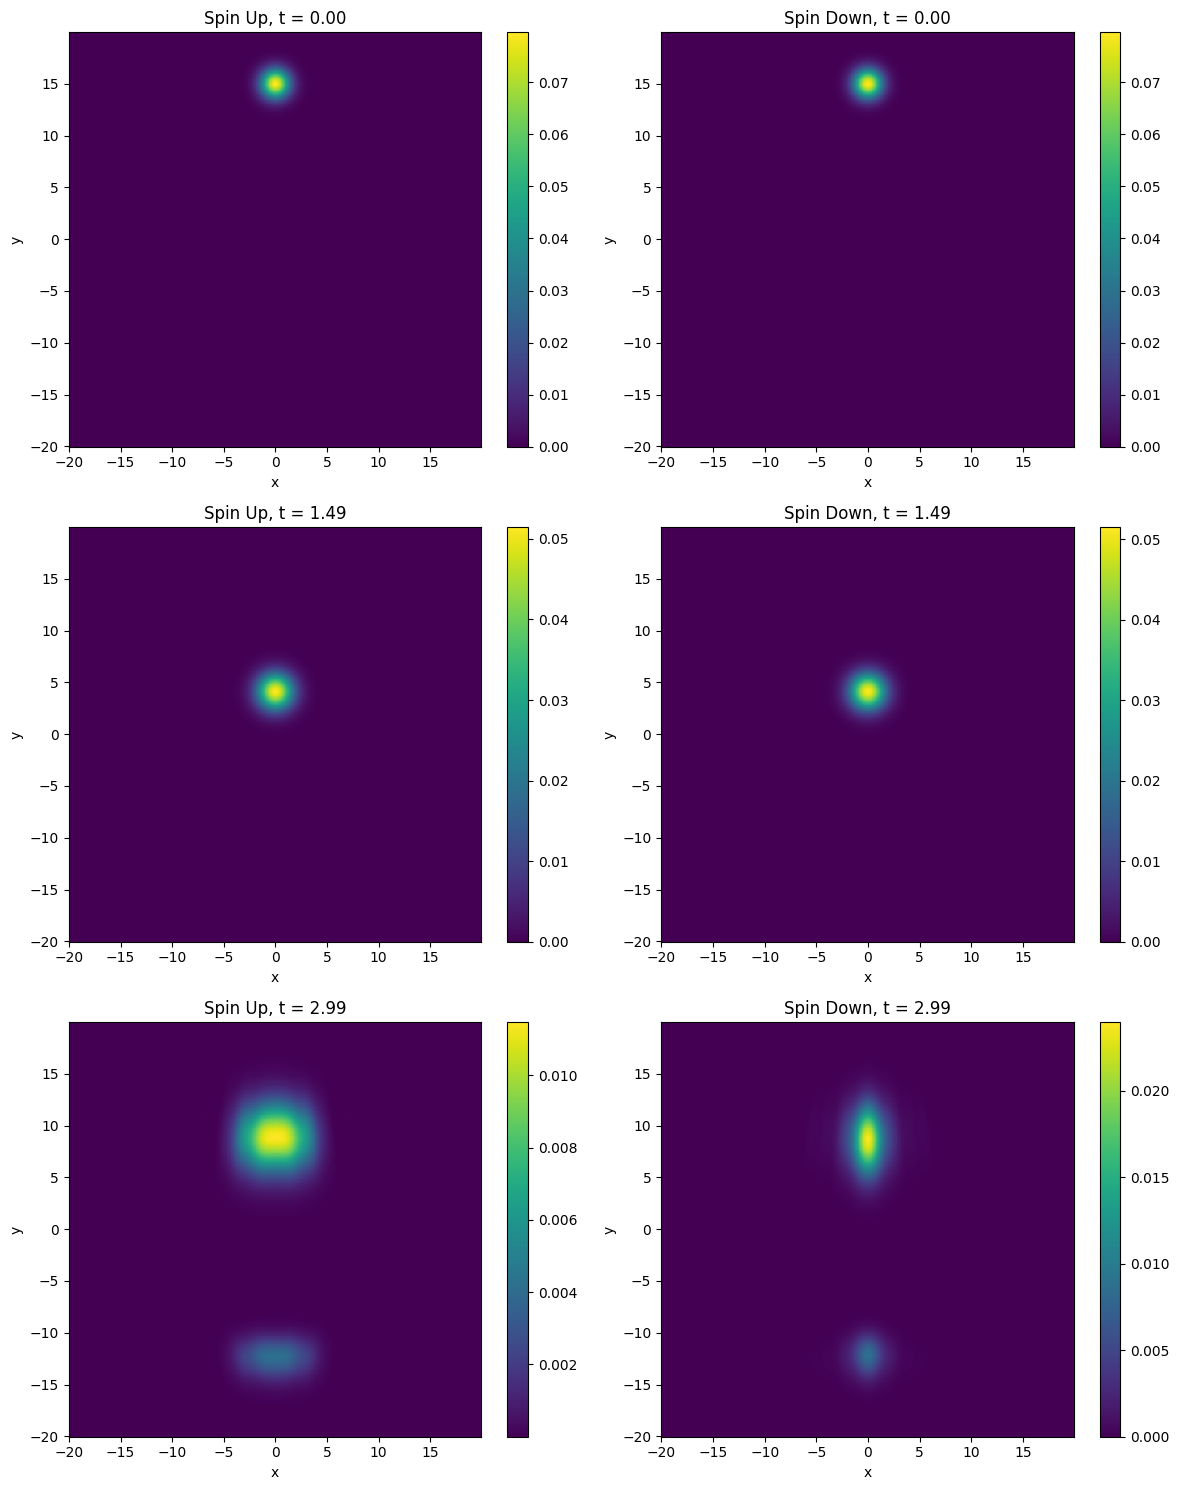

Data saved to: simulations_data/spin/simulation_20250408_01-37.pkl
Animation saved as: simulations_spin/20250408_01-45_quantum_evolution_mag_barrier_strength_4.0.mp4


In [3]:
params = {
	'x_min':-20, 'x_max':20, 'Nx':512,
	'y_min':-20, 'y_max':20, 'Ny':512,
	'n_steps':300, 'dt':0.01,
	'hbar':1.0, 'm':1.0,
	# Parameters for the magnetic barrier (spin-dependent potential)

	# Magnetic barrier parameters
	'mag_barrier_center_x':0.0,
	'mag_barrier_center_y':0.0,
	'mag_barrier_strength':4.0,
	'mag_barrier_width':4,

	'use_gravity':True,
	'g':9.81,

	# Initial wavepacket parameters (same for spin up component)
	'x0':0.0, 'y0':15.0, 'p0x':0.0, 'p0y':0.0, 'sigma':1.0
}

simulation_data = simulate_2d_spin(**params)

# Plot the potential
fig = plot_simulation_heatmaps_spin(simulation_data, num_frames=3)
plt.show()

# Pickle the data
pickle_file = save_simulation_data(simulation_data, params, base_dir='simulations_data/spin/')
print(f"Data saved to: {pickle_file}")

# Create animation
animation_file = create_animation_spin(simulation_data, output_file=f'simulations_spin/{datetime.datetime.now().strftime("%Y%m%d_%H-%M")}_quantum_evolution_mag_barrier_strength_{params["mag_barrier_strength"]}.mp4', fps=1/params['dt'])
log_simulation_parameters(animation_file, params, 'spin')
print(f"Animation saved as: {animation_file}")

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def measure_precession_angle(sim_data, dx, dy, hbar=1.0):
    """
    Given sim_data which contains lists of complex wavefunction arrays
    psi_up_list[t], psi_down_list[t], compute:
       - <sigma_x>(t)
       - <sigma_y>(t)
       - theta_x(t) = atan2(<sigma_y>, <sigma_x>)
    for each time step.
    Return arrays time_list, sx_list, sy_list, theta_list
    that you can plot or animate.
    """

    psi_up_list   = sim_data["psi_up_list"]   # shape [t][Nx,Ny] (complex)
    psi_down_list = sim_data["psi_down_list"] # shape [t][Nx,Ny] (complex)
    time_list     = sim_data["t"]             # shape [n_steps]

    n_steps = len(time_list)
    sx_list = np.zeros(n_steps, dtype=np.float64)
    sy_list = np.zeros(n_steps, dtype=np.float64)
    theta_list = np.zeros(n_steps, dtype=np.float64)

    # We assume wavefunction is normalized so that sum(|psi|^2)*dx*dy = 1
    # Then <sigma_x> in [-1,+1], <sigma_y> in [-1,+1].

    for i in range(n_steps):
        psi_up   = psi_up_list[i]
        psi_down = psi_down_list[i]

        # Overlap for cross terms:
        #   overlap = ∫ psi_up^*(r) psi_down(r) dr
        overlap_x = np.sum(np.conjugate(psi_up) * psi_down + np.conjugate(psi_down) * psi_up)
        overlap_y = np.sum(np.conjugate(psi_up) * psi_down - np.conjugate(psi_down) * psi_up)
        # multiply by dx*dy for the integral
        overlap_x *= (dx*dy)
        overlap_y *= (dx*dy)

        # <sigma_x> = overlap_up_dn + conj => 2 Re(overlap)
        sig_x = overlap_x.real
        # <sigma_y> = 2 Im(overlap)
        sig_y = overlap_y.imag

        sx_list[i] = sig_x
        sy_list[i] = sig_y
        theta_list[i] = np.arctan2(sig_y, sig_x)  # angle in [-pi, pi]

    return time_list, sx_list, sy_list, theta_list


def plot_precession(time_list, sx_list, sy_list, theta_list):
    """Make some simple plots of the net spin over time."""
    fig, axs = plt.subplots(3, 1, figsize=(6,8), sharex=True)

    axs[0].plot(time_list, sx_list, label=r'$\langle \sigma_x \rangle$')
    axs[0].legend(loc='best'); axs[0].grid(True)

    axs[1].plot(time_list, sy_list, label=r'$\langle \sigma_y \rangle$')
    axs[1].legend(loc='best'); axs[1].grid(True)

    axs[2].plot(time_list, theta_list, label=r'Precession angle $\theta$')
    axs[2].legend(loc='best'); axs[2].grid(True)
    axs[2].set_xlabel("Time")

    fig.tight_layout()
    plt.show()

In [ ]:
# Suppose we've stored wavefunction arrays in simulation_data["psi_up_list"], etc.
dx = (simulation_data["x"][1] - simulation_data["x"][0])
dy = (simulation_data["y"][1] - simulation_data["y"][0])

t_array, sx_array, sy_array, theta_array = measure_precession_angle(
	simulation_data, dx=dx, dy=dy, hbar=1.0
)

plot_precession(t_array, sx_array, sy_array, theta_array)

In [ ]:
len(theta_array)

In [ ]:
theta_array[0]* 180 / np.pi


In [ ]:
theta_array[-1] * 180 / np.pi

In [40]:
def calc_larmor_frequency(params, hbar=1.0):
	"""
	Compute the approximate Larmor frequency (omega_L) from simulation parameters.
	
	The code uses 'mag_barrier_strength' as the potential amplitude for spin-up,
	and the opposite sign for spin-down, producing an energy splitting of
	2 * mag_barrier_strength at the barrier peak. Then:
		omega_L = (energy difference) / hbar = 2 * mag_barrier_strength / hbar
	
	Parameters
	----------
	params : dict
		A dictionary with simulation parameters, expected to include:
			'mag_barrier_strength': float
				Peak amplitude of the spin-dependent barrier potential.
	hbar : float
		Reduced Planck's constant in our chosen units (default 1.0).
	
	Returns
	-------
	float
		The Larmor frequency in the same time units used by the simulation.
	"""
	v0 = params['mag_barrier_strength']
	delta_E = 2.0 * v0  # spin-up sees +v0, spin-down sees -v0
	omega_L = delta_E / hbar
	return omega_L

In [41]:
import numpy as np

In [ ]:
w_l = calc_larmor_frequency(params)
w_l # radians per time unit in simulation

print (f"Larmor frequency: {w_l} rad/time unit, or {w_l/(2*np.pi)} Hz")

We'll now calculate the actual dwell time 

In [ ]:
theta_array[153] / calc_larmor_frequency(params)

Classic Computation of particle falling through a barrier:

